In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

~derived data requires computation - bar graph is a derived data
~not all visualizations take same amount of time. so choosing the best plot is required. 

In [5]:
url = 'https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv'
iris = pd.read_csv(url)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


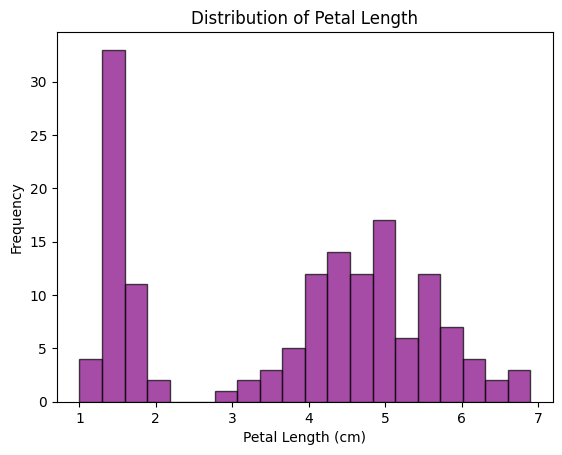

In [6]:
plt.hist(iris['petal_length'], bins=20, color='purple', edgecolor='black', alpha=0.7)
plt.title('Distribution of Petal Length')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Frequency')
plt.show()

KDE- Kernel Density Estimation
DCP - Density Contour Plots

Kernel Density Estimation (KDE) is a non-parametric way to estimate the probability density function of a dataset. Contour plots help visualize 2D densities.-derived

In [7]:
from scipy.stats import gaussian_kde

In [8]:
url1 = 'https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv'
iris1 = pd.read_csv(url1)
iris1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


1D Kernel Density

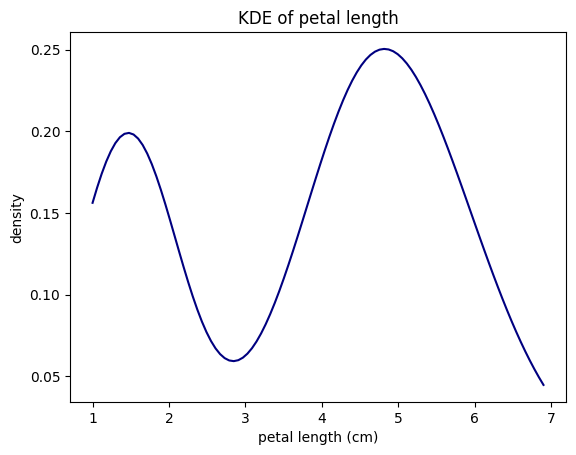

In [9]:
data=iris1['petal_length']
kde=gaussian_kde(data)
x=np.linspace(data.min(),data.max(),100)
plt.plot(x,kde(x),color='navy')
plt.title('KDE of petal length')
plt.xlabel('petal length (cm)')
plt.ylabel('density')
plt.show()

2D Kernel Density and Contour plot


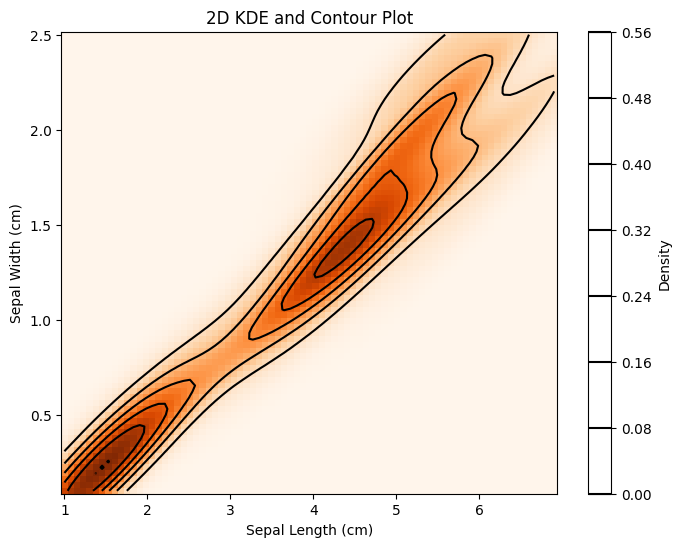

In [10]:
x=iris1['petal_length']
y=iris1['petal_width']
xy=np.vstack([x,y])
kde2d=gaussian_kde(xy)
xi,yi=np.mgrid[x.min():x.max():79j,y.min():y.max():79j]
zi = kde2d(np.vstack([xi.flatten(), yi.flatten()]))
plt.figure(figsize=(8,6))
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='auto', cmap='Oranges')
plt.contour(xi, yi, zi.reshape(xi.shape), colors='k')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('2D KDE and Contour Plot')
plt.colorbar(label='Density')
plt.show()

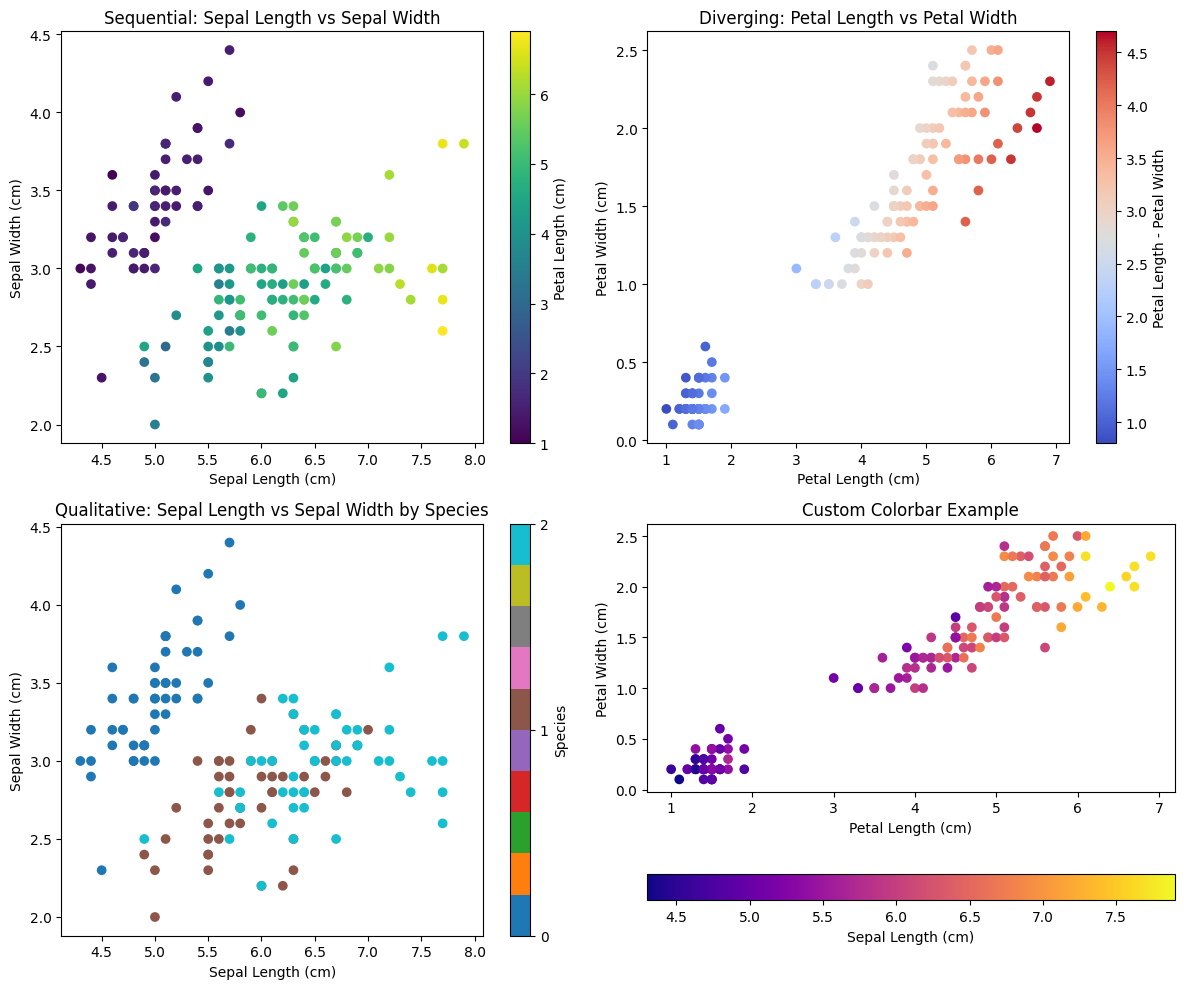

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the Iris dataset
url = 'https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv'
iris = pd.read_csv(url)

fig, axs = plt.subplots(2, 2, figsize=(12, 10)) #dimension of the grid

# Sequential colormap
sc1 = axs[0, 0].scatter(iris['sepal_length'], iris['sepal_width'], c=iris['petal_length'], cmap='viridis')
plt.colorbar(sc1, ax=axs[0, 0], label='Petal Length (cm)')
axs[0, 0].set_title('Sequential: Sepal Length vs Sepal Width')
axs[0, 0].set_xlabel('Sepal Length (cm)')
axs[0, 0].set_ylabel('Sepal Width (cm)')

# Diverging colormap
petal_diff = iris['petal_length'] - iris['petal_width']
sc2 = axs[0, 1].scatter(iris['petal_length'], iris['petal_width'], c=petal_diff, cmap='coolwarm')
plt.colorbar(sc2, ax=axs[0, 1], label='Petal Length - Petal Width')
axs[0, 1].set_title('Diverging: Petal Length vs Petal Width')
axs[0, 1].set_xlabel('Petal Length (cm)')
axs[0, 1].set_ylabel('Petal Width (cm)')

# Qualitative colormap
species = iris['species'].astype('category').cat.codes
sc3 = axs[1, 0].scatter(iris['sepal_length'], iris['sepal_width'], c=species, cmap='tab10')
plt.colorbar(sc3, ax=axs[1, 0], ticks=[0,1,2], label='Species')
axs[1, 0].set_title('Qualitative: Sepal Length vs Sepal Width by Species')
axs[1, 0].set_xlabel('Sepal Length (cm)')
axs[1, 0].set_ylabel('Sepal Width (cm)')

# Custom colorbar
sc4 = axs[1, 1].scatter(iris['petal_length'], iris['petal_width'], c=iris['sepal_length'], cmap='plasma')
cb = plt.colorbar(sc4, ax=axs[1, 1], orientation='horizontal', pad=0.2, label='Sepal Length (cm)')
axs[1, 1].set_title('Custom Colorbar Example')
axs[1, 1].set_xlabel('Petal Length (cm)')
axs[1, 1].set_ylabel('Petal Width (cm)')

plt.tight_layout()
plt.show()